In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

from matplotlib import rc
rc("font", family="serif", size=11)

In [53]:
nstars = 50
nparams = nstars*11+(3*3)+1
print(nparams)

df = pd.read_csv('hydra/tau_models.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
display(df.describe())

hier = pd.read_csv('hydra/fullsumm_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
#display(hier)
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AA']['mean']

560


,kic,dnu,numax,epsilon,alpha,A,G,phi,tau
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.316381e+06,5.587461,58.148050,0.084413,0.013779,0.032831,2.938674,1.284149,8.755342
std,3.250569e+06,0.959929,12.670523,0.285701,0.010671,0.039129,0.401678,0.855715,2.606236
min,2.436688e+06,4.326263,45.268762,-1.454653,0.003014,0.012416,2.195360,-0.786059,1.133393
25%,4.371265e+06,4.813362,47.580968,0.051988,0.010743,0.022710,2.730587,0.637557,7.541899
50%,8.718576e+06,5.309946,54.103912,0.081965,0.012650,0.027576,2.851132,1.353016,9.048988
75%,1.022154e+07,6.072970,64.272857,0.114880,0.014601,0.031225,3.115432,1.788836,10.252192
max,1.236654e+07,8.328015,91.671936,0.956396,0.083878,0.296691,4.000043,2.687207,14.468722


In [68]:
dnus = np.linspace(df['dnu'].min(), df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log10(dnus)

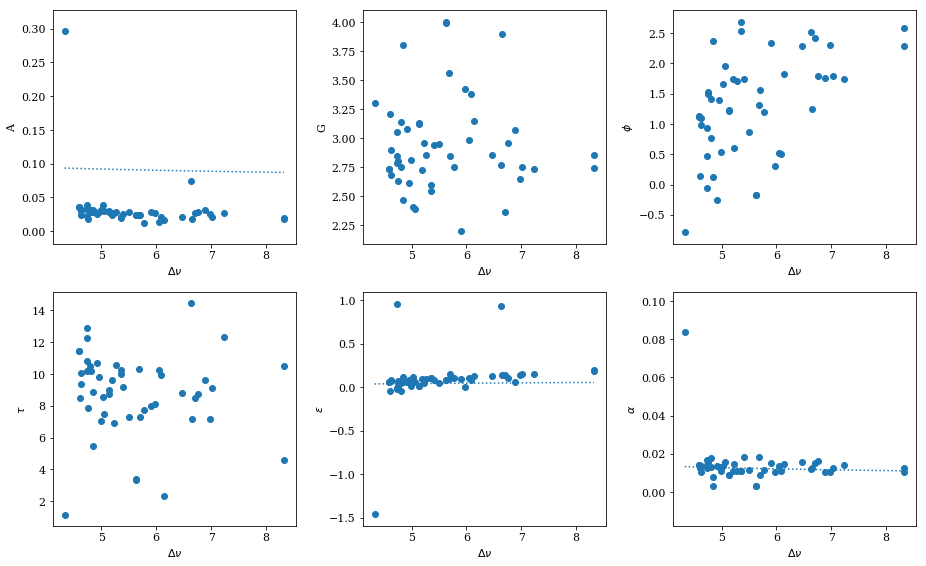

In [72]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(13,8))
ax1.scatter(df['dnu'], df['A'])
ax1.plot(dnus, As, ':')
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel('A')

ax2.scatter(df['dnu'], df['G'])
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel('G')

ax3.scatter(df['dnu'], df['phi'])
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel(r'$\phi$')

ax4.scatter(df['dnu'], df['tau'])
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel(r'$\tau$')

ax5.scatter(df['dnu'], df['epsilon'])
ax5.plot(dnus, epsilons, ':')
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\epsilon$')

ax6.scatter(df['dnu'], df['alpha'])
ax6.plot(dnus, alphas, ':')
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.show()

In [126]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff', '[M/H]1', 'M1', 'R1'])
apokasc = apokasc.replace('        ', np.nan)
#display(apokasc)

metals = []
for i in df['kic']:
    if any(apokasc['KIC'] == i):
        t = apokasc.loc[(apokasc.KIC == i)]['[M/H]1'].values
        metals.append(t[0])
    else:
        metals.append(np.nan)

df['[M/H]'] = metals
display(df.head())

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,[M/H]
0,9147335,4.988874,50.067357,0.017098,0.010805,0.031629,2.811775,0.529363,7.036156,0.10
1,11413138,4.628636,46.906987,0.069031,0.010552,0.030682,2.902354,1.104854,10.049844,0.12
2,9970830,4.326263,49.022078,-1.454653,0.083878,0.296691,3.306798,-0.786059,1.133393,0.08
3,9411366,4.910358,47.368545,0.064698,0.013659,0.025106,3.082391,-0.253121,10.719545,-0.14
4,3429738,5.897368,56.127709,0.094538,0.015391,0.029235,2.195360,2.337548,7.993061,-0.24


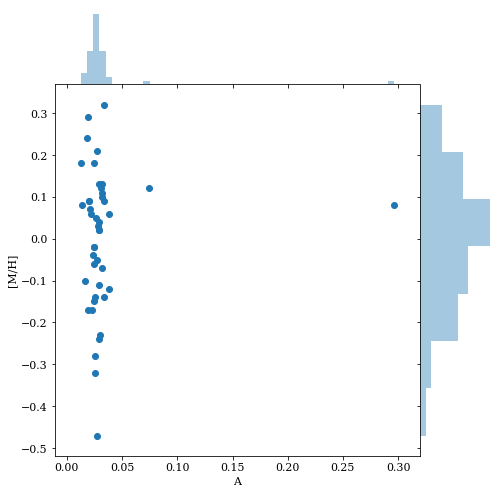

In [139]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['[M/H]'], height=7, space=0)

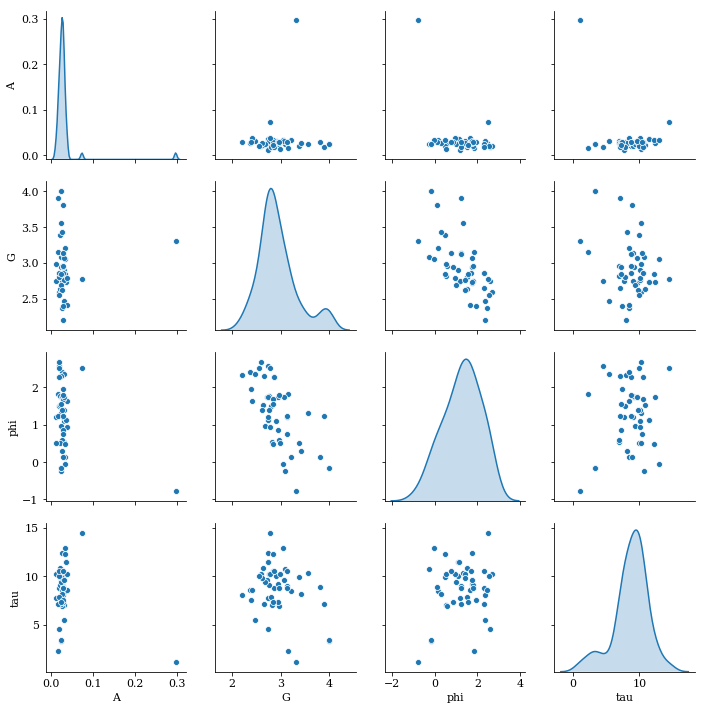

In [149]:
 g = sns.pairplot(df, vars=["A", "G", "phi", "tau"], diag_kind='kde')